In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
from astropy import modeling
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

From Ragunathan et al. (2016)

(1) Create a window with width Wwidth centred on each pixel of
the spectrum containing Npix pixels and record the window Wmax
containing the maximum deviation.

(2) Average the flux values in Wmax.

(3) Steps 1 and 2 are repeated Wpass times until the entire spectrum
is averaged out for the chosen window size.

(4) Repeat steps 1 through 3 for Wtotal window sizes

Median used for pseudo spectrum to better capture the emission features but not absorption features

Wtotal=11
Npixel= 30 pixels

Wwidth =
 2^x for runs 1 ≤ x ≤ 6
2^{11−(x−1)} for runs 7 ≤ x ≤ 11

Wpass =
 Npix for 1 ≤ x ≤ 6
Npix/{11−(x−1)} for 7 ≤ x ≤ 11

Questions:
              -I don't understand distinction between windown width and Npix value, don't they set each other
              -What is the Wmax we are recording? Max value in the window? why?

In [2]:
#This is sloppy, must be cleaner np way to write the median replacements?
#also i think my slices are going past 0 and top index of array which is no-bueno

def window_median(data,Npix):
    n_data = np.array(data)
    for i in range(len(data)):
        n_data[i]=np.median(data[int(i-Npix/2):int(i+Npix/2)]) #why do i need these int fns? shouldn't they be ints?
            
    return n_data

/Users/napolilg/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/napolilg/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


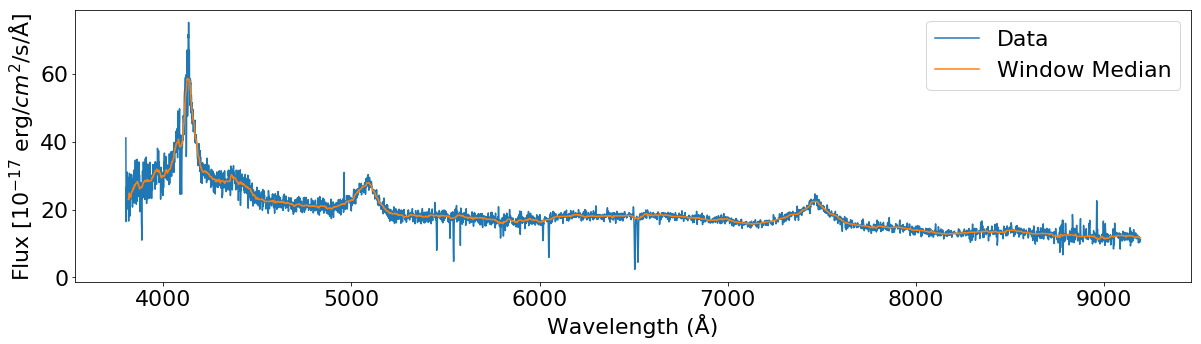

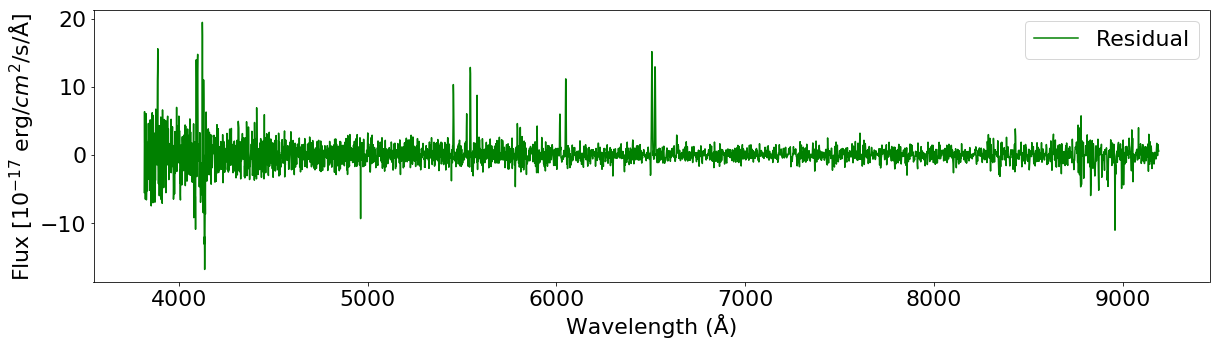

In [40]:
#Plotting SDSS quasar at the moment because the cori server is down when i'm writing this. should be 'easily' replaced.
#open fits file
m_hdul = fits.open('spec-0270-51909-0213.fits')
m_data = m_hdul[1].data

#perform a window median run
one_run=window_median(m_data.field(0),30)

#calculate residual
residual=one_run-m_data.field(0)

#determine x_range from wavelength data
x_spc=10**m_data.field(1)


fig = plt.figure(figsize=(20,5))
#plot window median-ed data  vs. initial data 
plt.plot(x_spc,m_data.field(0),label='Data')
plt.plot(x_spc,one_run,label='Window Median')
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')
plt.show()

fig = plt.figure(figsize=(20,5))
#plot residual
plt.plot(x_spc,residual,c='g',label='Residual')
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')
plt.show()


Peak Locations =  [3887.765  4091.6653 4099.2085 4123.8223 4130.4746 5453.8105 5543.7026
 6049.227  6505.7876 6522.2876]
Peak Widths =  [4.03179026 5.36943531 3.87811184 4.24769783 1.23985291 4.24831486
 4.06938362 4.01002121 2.03167534 6.12528419]


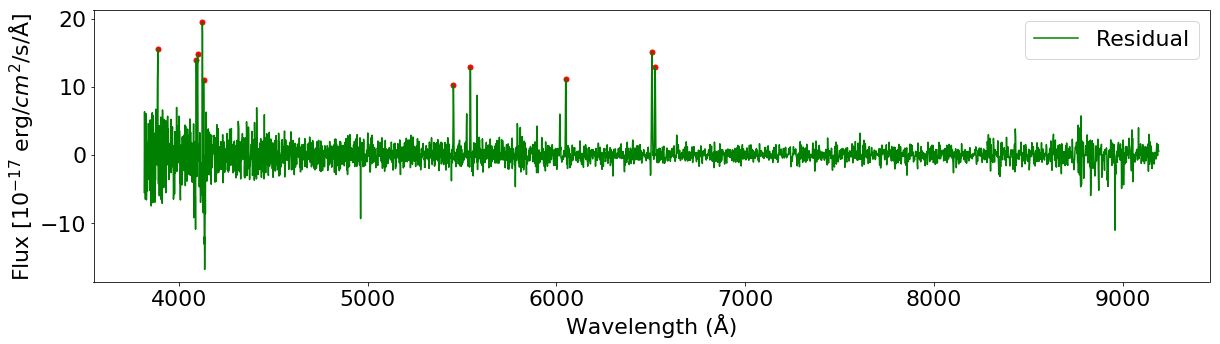

In [41]:

#find_peaks docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

#arbitrarily looking at peaks over max_val/2, should improve criteria
#width is passed only so that width values are returned in dictionary
peaks=find_peaks(residual,height=np.nanmax(residual)/2,width=1)
#peaks[0] is array indices, peaks[1] is dictionary with passed params

#appears to be z=1.32 for MgII feature at 6505,6522. Line seperation matches at ~7 angstroms

print('Peak Locations = ',x_spc[peaks[0]])
print('Peak Widths = ',peaks[1]["width_heights"])

fig = plt.figure(figsize=(20,5))

plt.scatter(x_spc[peaks[0]],peaks[1]["peak_heights"],c='r',s=25)
plt.plot(x_spc,residual,c='g',label='Residual')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')
plt.legend()
plt.show()

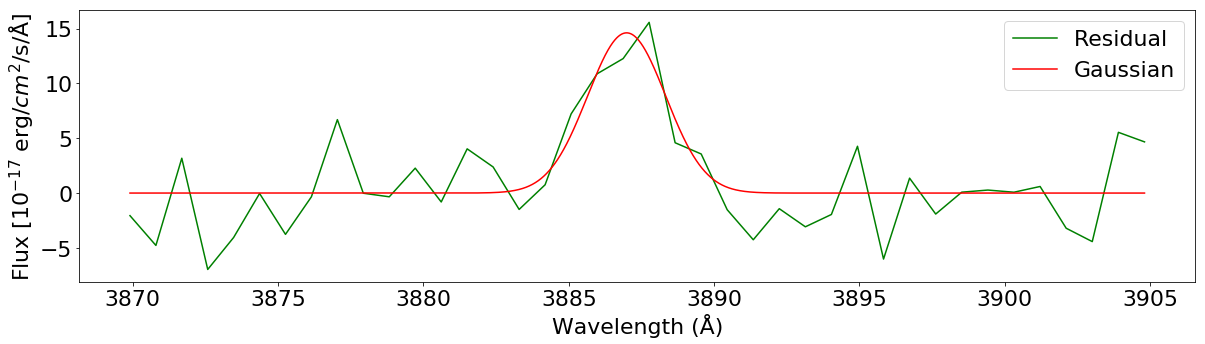

Height: 14.612340540416627 +\- 2.4669667528601034
Center: 3886.9900819746845 +\- 0.26180357140277605
FWHM  : 3.156768811101601 +\- 0.6154148047421284



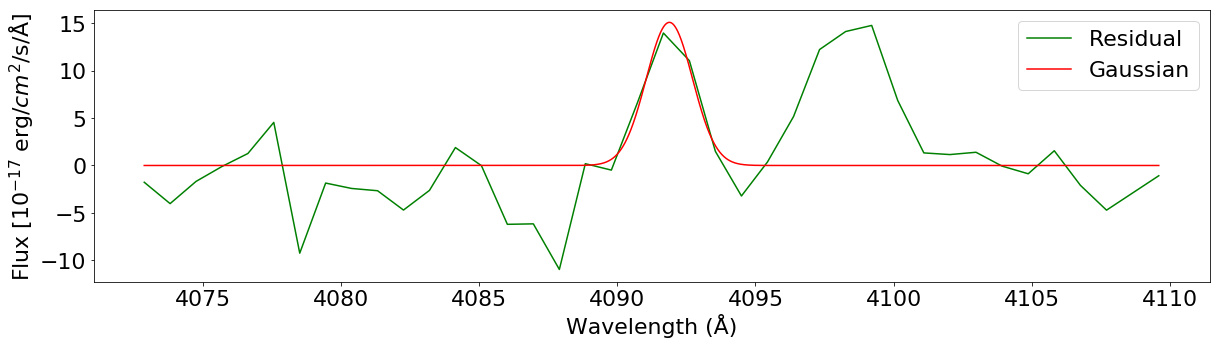

Height: 15.07326258922709 +\- 5.237834463001769
Center: 4091.8821949149415 +\- 0.3376097782782339
FWHM  : 1.969179185235989 +\- 0.7886136405233691



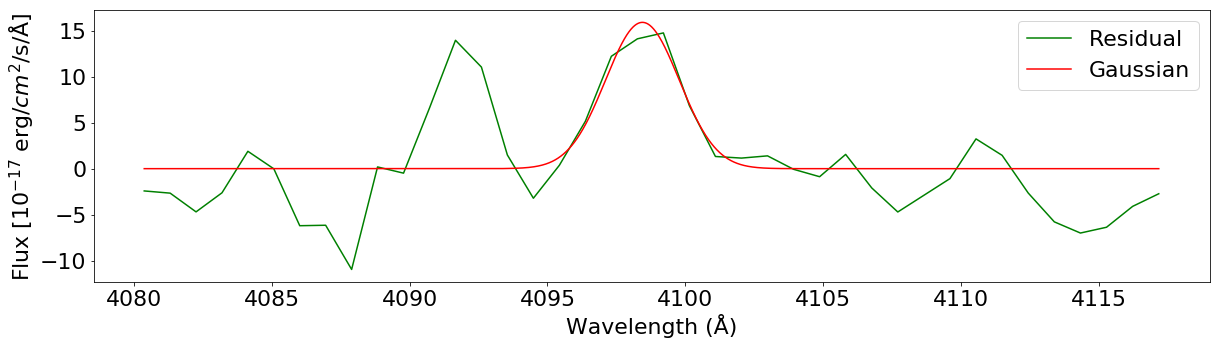

Height: 15.897252051604374 +\- 3.6650530912024175
Center: 4098.446823506573 +\- 0.35525421147071207
FWHM  : 3.135940502525981 +\- 0.8350194037888383



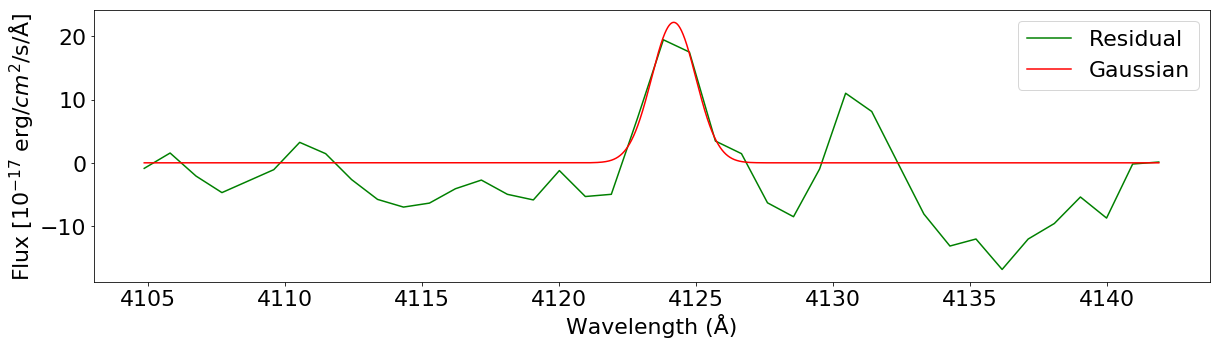

Height: 22.197667139565176 +\- 6.819125556941794
Center: 4124.201267891877 +\- 0.27595452212192545
FWHM  : 1.894054013524335 +\- 0.6891210057563019



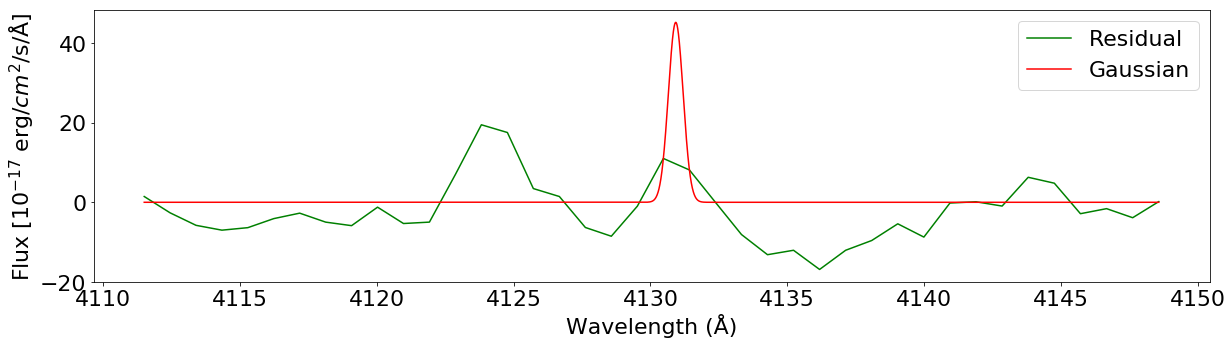

Height: 45.140330797348255 +\- 673122.8722614604
Center: 4130.927512591293 +\- 223.81324497181268
FWHM  : 0.633272391129906 +\- 3055.0460391316765



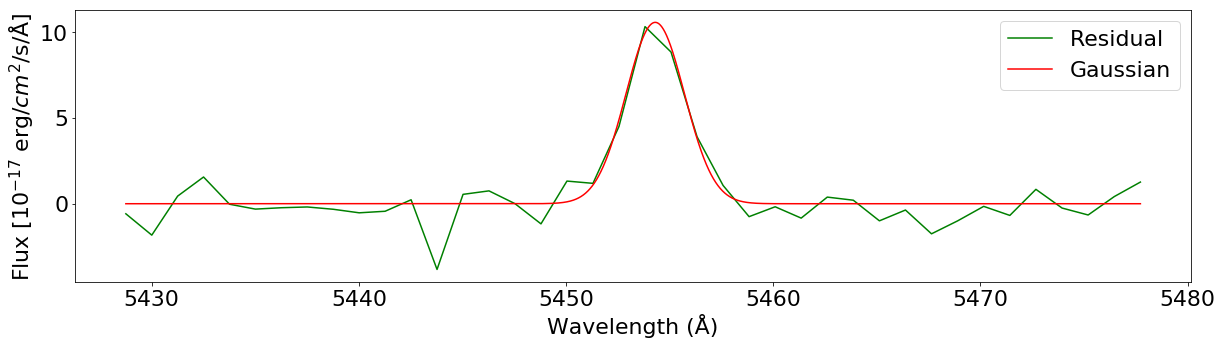

Height: 10.553674756386377 +\- 0.8582942956603591
Center: 5454.304143285351 +\- 0.13252297225143808
FWHM  : 3.3146522518130297 +\- 0.31139751603391363



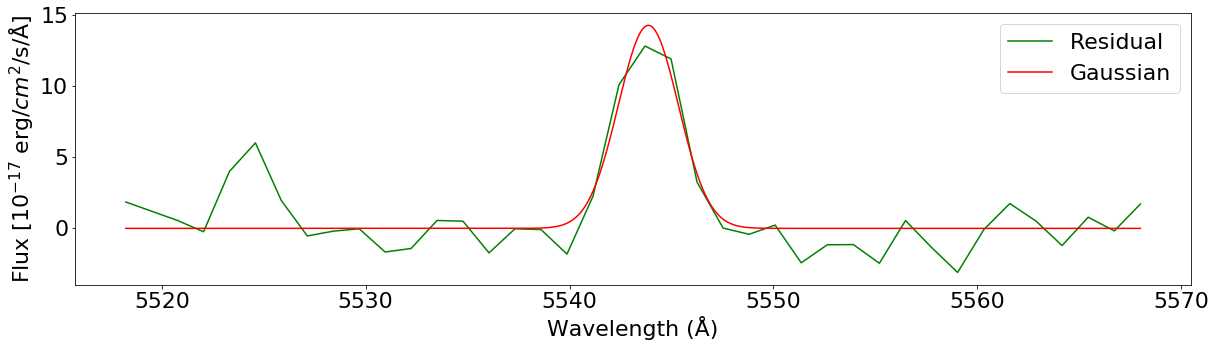

Height: 14.280309241222577 +\- 1.510946211420542
Center: 5543.868793089957 +\- 0.18002600766007074
FWHM  : 3.4626388113858377 +\- 0.4230538808060586



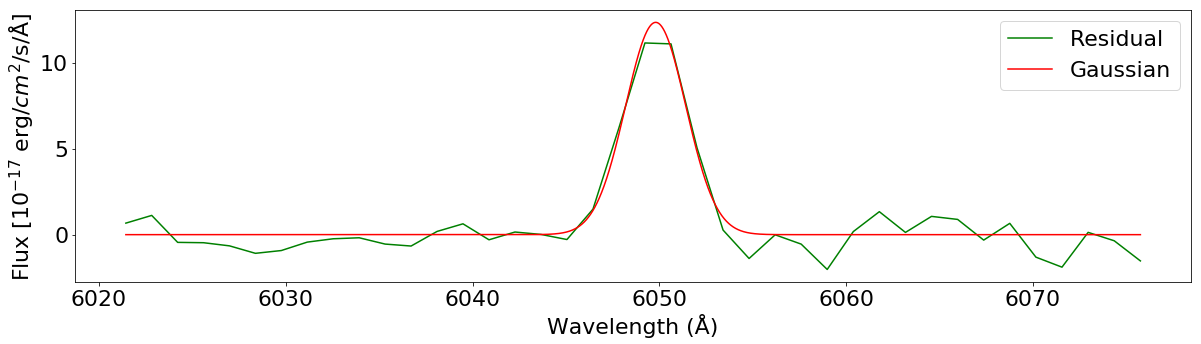

Height: 12.343540892268544 +\- 0.716958508633582
Center: 6049.80306138211 +\- 0.10794274955383525
FWHM  : 3.787364697525895 +\- 0.254006095899178



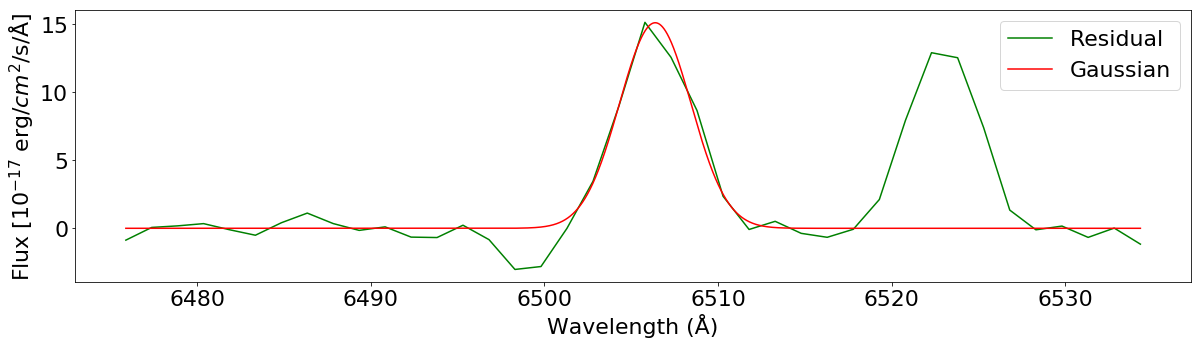

Height: 15.116626365397657 +\- 2.815888663556796
Center: 6506.3801203690755 +\- 0.4427189379773516
FWHM  : 4.840854656031124 +\- 1.0410973823731853



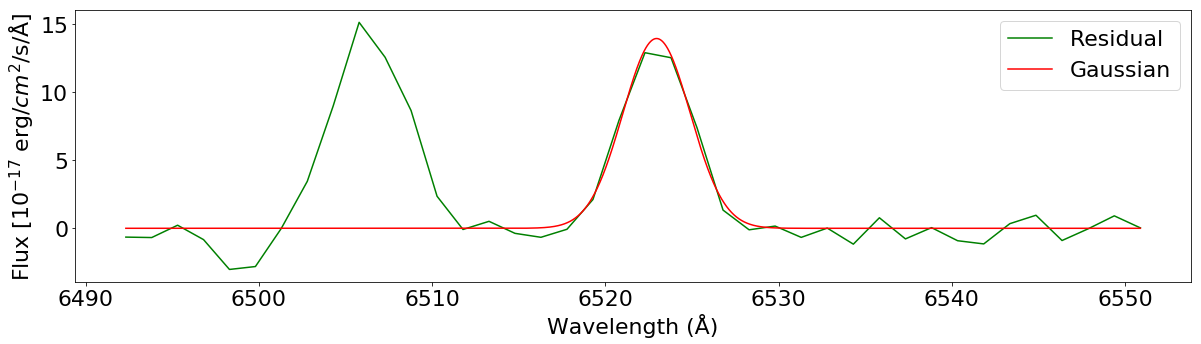

Height: 13.956230989530198 +\- 3.2320486556881103
Center: 6522.956746377698 +\- 0.5189364541347015
FWHM  : 4.564637427923128 +\- 1.2204550453554575



In [42]:

fitter = modeling.fitting.LevMarLSQFitter()
#how large should bin box be around the peaks to fit a gaussian?
sub_region_size=20

for i in peaks[0]:
    #define subregion in x and y
    x_reg=x_spc[i-sub_region_size:i+sub_region_size]
    y_reg=residual[i-sub_region_size:i+sub_region_size]
    
    #fit a gaussian using priors of amplitude=max in region and center=peak location
    model = modeling.models.Gaussian1D(amplitude=np.nanmax(y_reg),mean=np.average(x_reg),stddev=1)
    fitted_model = fitter(model=model, x=x_reg, y=y_reg)
    #errors from covariance matrix
    cov_diag = np.diag(fitter.fit_info['param_cov'])

    #define fine x_region to plot gaussian
    x_lins=np.linspace(x_reg[0],x_reg[-1],10000)
    fig = plt.figure(figsize=(20,5))

    plt.plot(x_reg,y_reg,c='g',label='Residual')
    #plt.plot(x_reg,m_reg)
    plt.plot(x_lins,fitted_model(x_lins),c='r',label='Gaussian')
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')
    plt.legend()
    plt.show()
    
    #Print Gaussian details
    print('Height: {} +\- {}'.format(fitted_model.amplitude.value, np.sqrt(cov_diag[0])))
    print('Center: {} +\- {}'.format(fitted_model.mean.value, np.sqrt(cov_diag[1])))
    #For a gaussian FWHM=2.355*sigma
    print('FWHM  : {} +\- {}'.format(2.35*fitted_model.stddev.value, 2.35*np.sqrt(cov_diag[2])))
    #from astropy docs: http://learn.astropy.org/rst-tutorials/Models-Quick-Fit.html
    print()

Model: CompoundModel93
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=5., mean=0., stddev=1.)>

    [1]: <Gaussian1D(amplitude=5., mean=7., stddev=1.)>
Parameters:
    amplitude_0 mean_0 stddev_0 amplitude_1 mean_1 stddev_1
    ----------- ------ -------- ----------- ------ --------
            5.0    0.0      1.0         5.0    7.0      1.0


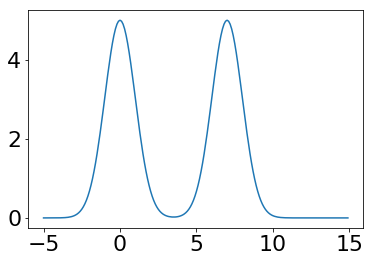

In [36]:
#Next Steps, maybe instead of fitting a single gaussian we can attempt two offset gaussians to MgII?

model = modeling.models.Gaussian1D(amplitude=5,mean=0,stddev=1)+modeling.models.Gaussian1D(amplitude=5,mean=7,stddev=1)
print(model)
x_spc=np.arange(-5,15,0.1)
plt.plot(x_spc,model(x_spc))
plt.show()

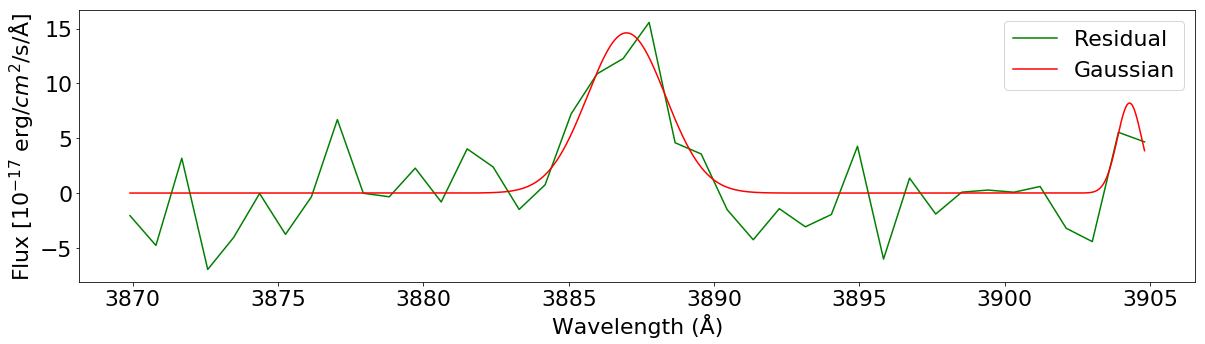

1st peak: Height =  14.610004020269734  Center =  3886.985524408179  FWHM =  3.164482161730273
2nd peak: Height =  8.208163742761759  Center =  3904.294387094996  FWHM =  0.9900360113013602


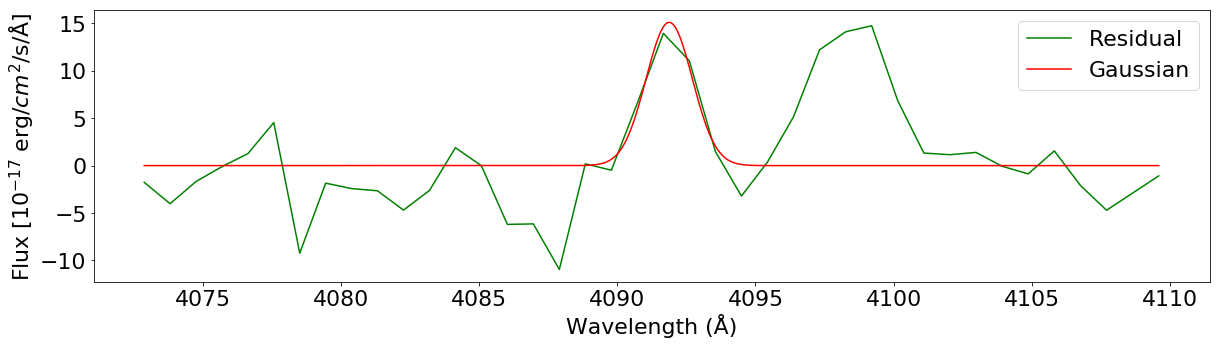

1st peak: Height =  15.104203415186905  Center =  4091.8760286065594  FWHM =  1.9729657123110946
2nd peak: Height =  0.36078157241454517  Center =  4104.599235250036  FWHM =  2.768289196186487e-38


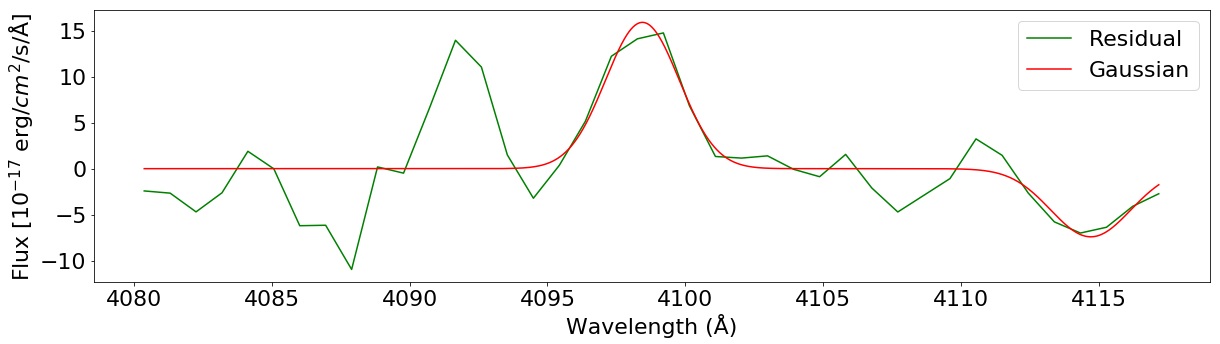

1st peak: Height =  15.897200524880462  Center =  4098.447074950895  FWHM =  3.1426327752702248
2nd peak: Height =  -7.405001960376543  Center =  4114.713108224863  FWHM =  3.4179975284066457


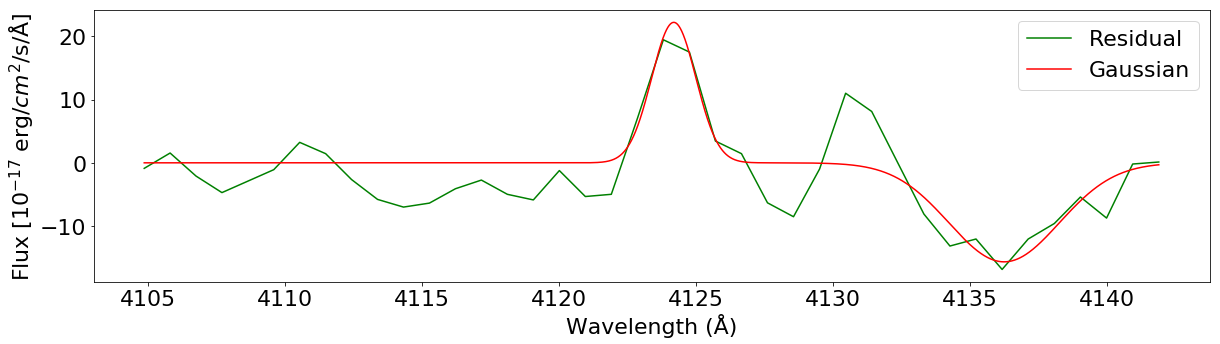

1st peak: Height =  22.19785610921144  Center =  4124.202686878857  FWHM =  1.8980698584090245
2nd peak: Height =  -15.64665703131298  Center =  4136.258623152774  FWHM =  4.741428399704423


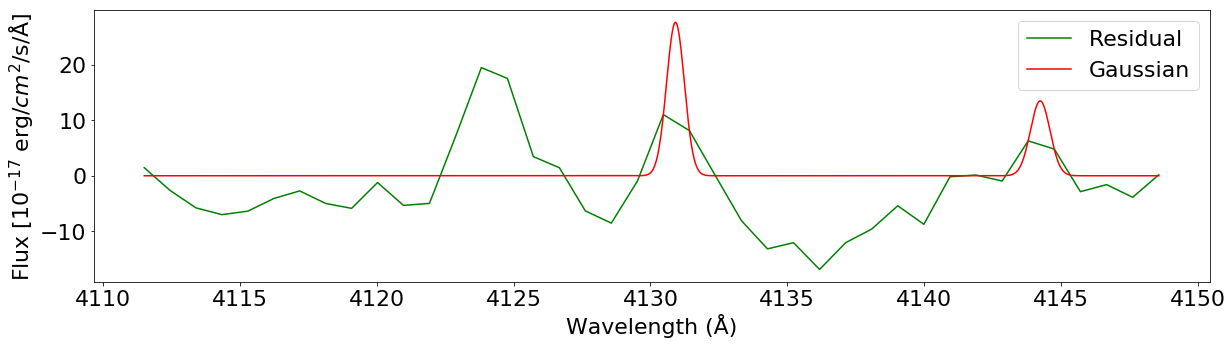

1st peak: Height =  27.583246485967468  Center =  4130.917325736959  FWHM =  0.7661457154257166
2nd peak: Height =  13.45796139613017  Center =  4144.2495528500185  FWHM =  0.8405673662072823


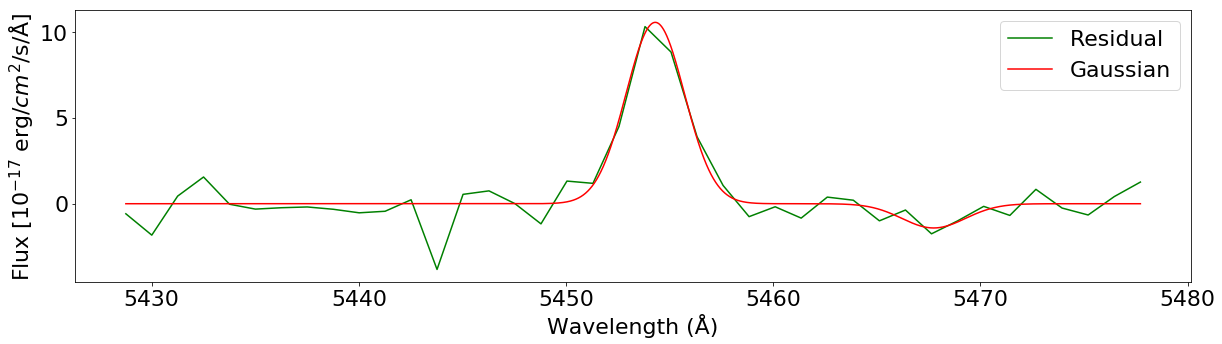

1st peak: Height =  10.553587526548492  Center =  5454.3052342758565  FWHM =  3.3217589388368562
2nd peak: Height =  -1.4111022382882328  Center =  5467.744201453859  FWHM =  3.607266619725585


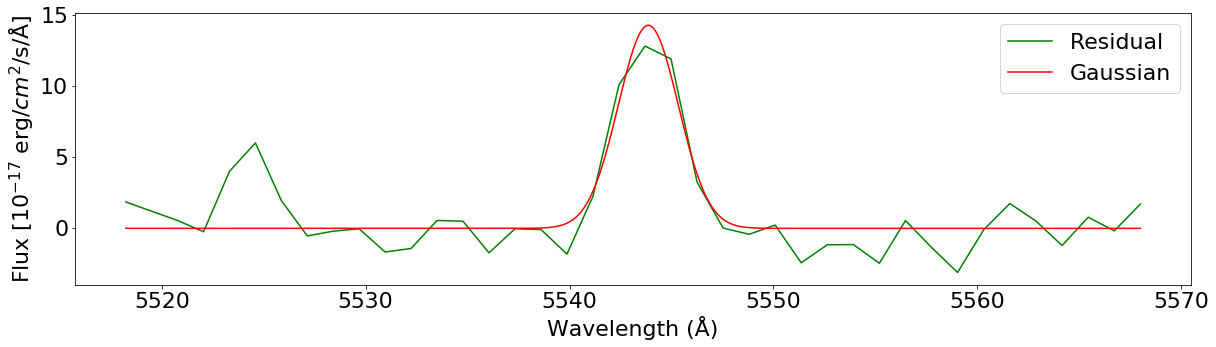

1st peak: Height =  14.280348869290815  Center =  5543.866892609954  FWHM =  3.469983334330099
2nd peak: Height =  4.953261625648032  Center =  5557.361056642531  FWHM =  2.768289196186487e-38


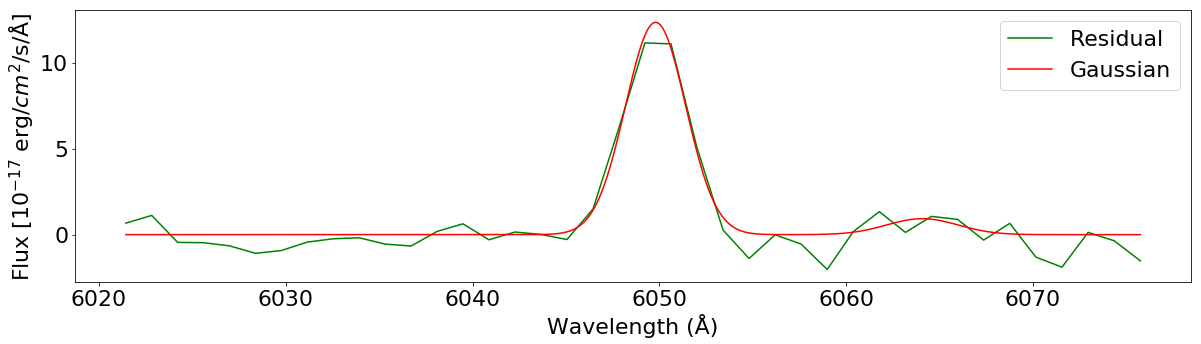

1st peak: Height =  12.342133479786076  Center =  6049.797449156986  FWHM =  3.7962550770928893
2nd peak: Height =  0.9300725315621514  Center =  6064.076171558479  FWHM =  4.493123197439155


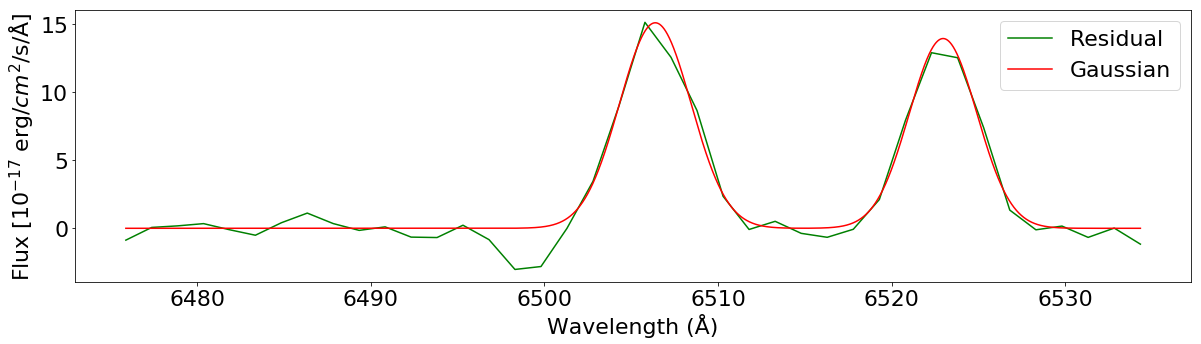

1st peak: Height =  15.113917065367556  Center =  6506.382815849483  FWHM =  4.852578116929889
2nd peak: Height =  13.955482151763013  Center =  6522.955483482873  FWHM =  4.574827588011346


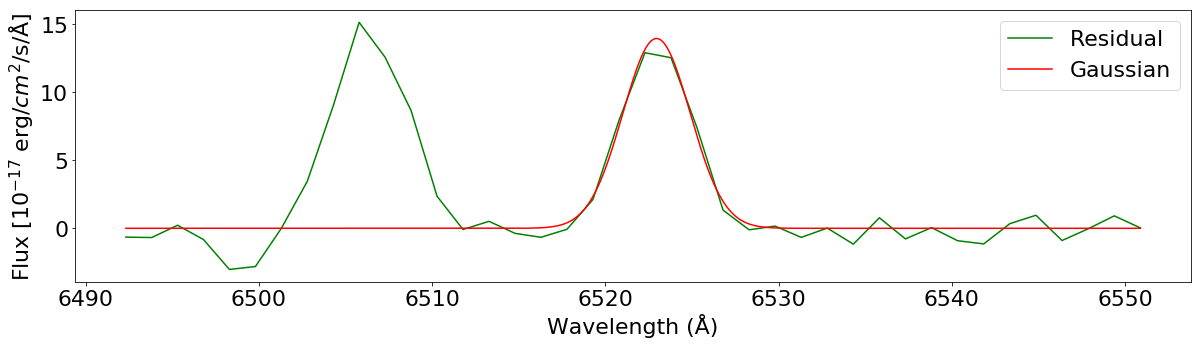

1st peak: Height =  13.955674474101292  Center =  6522.955487090307  FWHM =  4.574756280647751
2nd peak: Height =  0.9759146078986256  Center =  6535.878613418623  FWHM =  2.768289196186487e-38


In [51]:
#ok so thats like really really easy, lets try applying to the data we have
fitter = modeling.fitting.LevMarLSQFitter()
sub_region_size=20


#for now lets use the same peaks detected as one peak, but use the two peak model

#determing the correct values of the offset to try will be important
#some basic bounds from observability constraints (i.e. z_abs<z_em)
peak_offset=14

for i in peaks[0]:
    #define subregion in x and y
    x_reg=x_spc[i-sub_region_size:i+sub_region_size]
    y_reg=residual[i-sub_region_size:i+sub_region_size]
    
    #fit a gaussian using priors of amplitude=max in region and center=peak location
    model = modeling.models.Gaussian1D(amplitude=np.nanmax(y_reg),mean=np.average(x_reg),stddev=1)+modeling.models.Gaussian1D(amplitude=np.nanmax(y_reg),mean=14+np.average(x_reg),stddev=1)

    fitted_model = fitter(model=model, x=x_reg, y=y_reg)

    
    #errors from covariance matrix 
    #(errors get harder with two model components, will need to re-examine how to determine)
    #cov_diag = np.diag(fitter.fit_info['param_cov'])

    #define fine x_region to plot gaussian
    x_lins=np.linspace(x_reg[0],x_reg[-1],10000)
    fig = plt.figure(figsize=(20,5))

    plt.plot(x_reg,y_reg,c='g',label='Residual')
    #plt.plot(x_reg,m_reg)
    plt.plot(x_lins,fitted_model(x_lins),c='r',label='Gaussian')
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')
    plt.legend()
    plt.show()
    print('1st peak: Height = ',fitted_model.parameters[0],' Center = ',fitted_model.parameters[1],' FWHM = ',2.355*fitted_model.parameters[2])
    print('2nd peak: Height = ',fitted_model.parameters[3],' Center = ',fitted_model.parameters[4],' FWHM = ',2.355*fitted_model.parameters[5])
    
    